# Data Scientist Nanodegree
## Supervised Learning
## Project: Finding Donors for *CharityML*

Welcome to the first project of the Data Scientist Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Please specify WHICH VERSION OF PYTHON you are using when submitting this notebook. Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will employ several supervised algorithms of your choice to accurately model individuals' income using data collected from the 1994 U.S. Census. You will then choose the best candidate algorithm from preliminary results and further optimize this algorithm to best model the data. Your goal with this implementation is to construct a model that accurately predicts whether an individual makes more than $50,000. This sort of task can arise in a non-profit setting, where organizations survive on donations.  Understanding an individual's income can help a non-profit better understand how large of a donation to request, or whether or not they should reach out to begin with.  While it can be difficult to determine an individual's general income bracket directly from public sources, we can (as we will see) infer this value from other publically available features. 

The dataset for this project originates from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Census+Income). The datset was donated by Ron Kohavi and Barry Becker, after being published in the article _"Scaling Up the Accuracy of Naive-Bayes Classifiers: A Decision-Tree Hybrid"_. You can find the article by Ron Kohavi [online](https://www.aaai.org/Papers/KDD/1996/KDD96-033.pdf). The data we investigate here consists of small changes to the original dataset, such as removing the `'fnlwgt'` feature and records with missing or ill-formatted entries.

----
## Exploring the Data
Run the code cell below to load necessary Python libraries and load the census data. Note that the last column from this dataset, `'income'`, will be our target label (whether an individual makes more than, or at most, $50,000 annually). All other columns are features about each individual in the census database.

In [3]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from time import time
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualization code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline
import pathlib

import numpy as np
import pandas as pd

import tensorflow as tf

from tensorflow import feature_column
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

In [4]:


dataset_url = 'http://storage.googleapis.com/download.tensorflow.org/data/petfinder-mini.zip'
csv_file = 'datasets/petfinder-mini/petfinder-mini.csv'

tf.keras.utils.get_file('petfinder_mini.zip', dataset_url,
                        extract=True, cache_dir='.')
data = pd.read_csv(csv_file)

1671168/1668792 [==============================] - 0s 0us/step


In [5]:
data.head(5)

,Type,Age,Breed1,Gender,Color1,Color2,MaturitySize,FurLength,Vaccinated,Sterilized,Health,Fee,Description,PhotoAmt,AdoptionSpeed
0,Cat,3,Tabby,Male,Black,White,Small,Short,No,No,Healthy,100,Nibble is a 3+ month old ball of cuteness. He ...,1,2
1,Cat,1,Domestic Medium Hair,Male,Black,Brown,Medium,Medium,Not Sure,Not Sure,Healthy,0,I just found it alone yesterday near my apartm...,2,0
2,Dog,1,Mixed Breed,Male,Brown,White,Medium,Medium,Yes,No,Healthy,0,Their pregnant mother was dumped by her irresp...,7,3
3,Dog,4,Mixed Breed,Female,Black,Brown,Medium,Short,Yes,No,Healthy,150,"Good guard dog, very alert, active, obedience ...",8,2
4,Dog,1,Mixed Breed,Male,Black,No Color,Medium,Short,No,No,Healthy,0,This handsome yet cute boy is up for adoption....,3,2


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11537 entries, 0 to 11536
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Type           11537 non-null  object
 1   Age            11537 non-null  int64 
 2   Breed1         11537 non-null  object
 3   Gender         11537 non-null  object
 4   Color1         11537 non-null  object
 5   Color2         11537 non-null  object
 6   MaturitySize   11537 non-null  object
 7   FurLength      11537 non-null  object
 8   Vaccinated     11537 non-null  object
 9   Sterilized     11537 non-null  object
 10  Health         11537 non-null  object
 11  Fee            11537 non-null  int64 
 12  Description    11528 non-null  object
 13  PhotoAmt       11537 non-null  int64 
 14  AdoptionSpeed  11537 non-null  int64 
dtypes: int64(4), object(11)
memory usage: 1.3+ MB


- there are 4  contineous values features and 9 categoriacal features and in total there are 45222 rows and 14 cols.
- 4.6 mb data
- dependent value id income, which is categoriacal  non qantitative. <=50K or >50K class. 
- so binary class problem.


# STATISTICS OF CONTINEOUS VARIABLE FEATURES: 

In [7]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,11537.0,11.743434,19.324221,0.0,2.0,4.0,12.0,255.0
Fee,11537.0,23.957268,80.024226,0.0,0.0,0.0,0.0,2000.0
PhotoAmt,11537.0,3.610211,3.145872,0.0,2.0,3.0,5.0,30.0
AdoptionSpeed,11537.0,2.486522,1.173275,0.0,2.0,2.0,4.0,4.0


# STATISTICS OF CATEGORICAL VARIABLE FEATURES: 

In [8]:
data.describe(include=np.object).transpose()

,count,unique,top,freq
Type,11537,2,Dog,6601
Breed1,11537,166,Mixed Breed,4629
Gender,11537,2,Female,6466
Color1,11537,7,Black,5241
Color2,11537,7,No Color,3968
MaturitySize,11537,3,Medium,8016
FurLength,11537,3,Short,6676
Vaccinated,11537,3,Yes,5060
Sterilized,11537,3,No,7497
Health,11537,3,Healthy,11098


# NUMBERS OF THE MISSING NO OF VARIABLES :

In [9]:
data.isnull().sum()

Type             0
Age              0
Breed1           0
Gender           0
Color1           0
Color2           0
MaturitySize     0
FurLength        0
Vaccinated       0
Sterilized       0
Health           0
Fee              0
Description      9
PhotoAmt         0
AdoptionSpeed    0
dtype: int64

# DISTRIBUTION OF DEPENDENT VARIABLE :

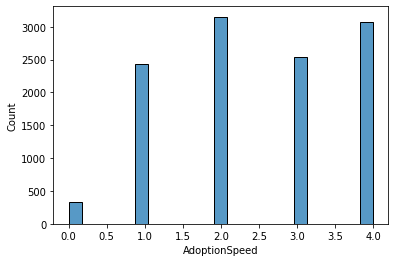

In [10]:
import seaborn as sns
#histogram
sns.histplot(data['AdoptionSpeed']);

- class imbalance is noticed by a huge amount 

# CO-RELATION  MATRIX BETWEEN DIFFERNT FEATURES :

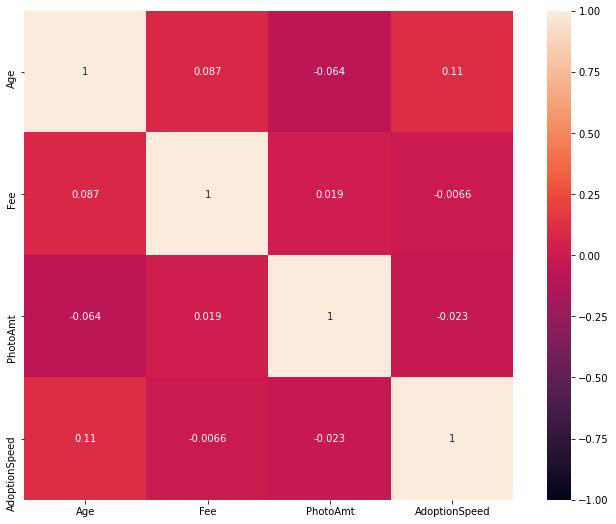

In [11]:
import matplotlib.pyplot as plt

#correlation matrix
corrmat = data.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=1,vmin=-1 ,square=True , annot=True);

# RELATIONSHIPS BETWEEN THE DIFFERNT FEATURES WITH REACH OTHER :(BOTH CATEGORICAL & CONTINEOUS):

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:1912: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


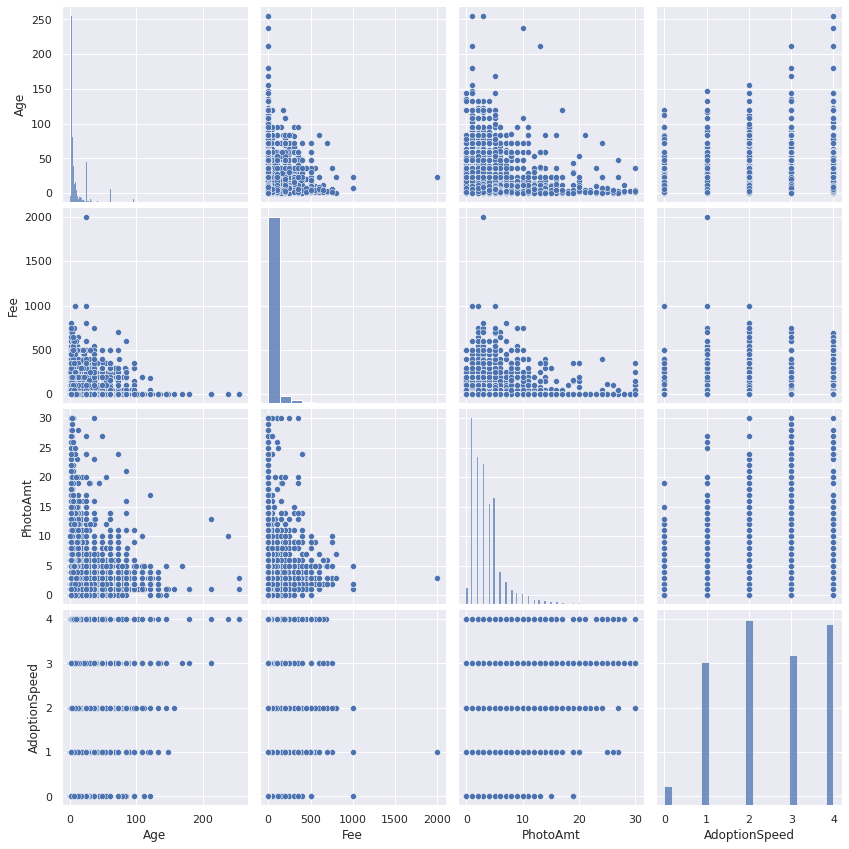

In [12]:
sns.set()
cols = list(data.columns)
sns.pairplot(data[cols], size = 3)
plt.show();

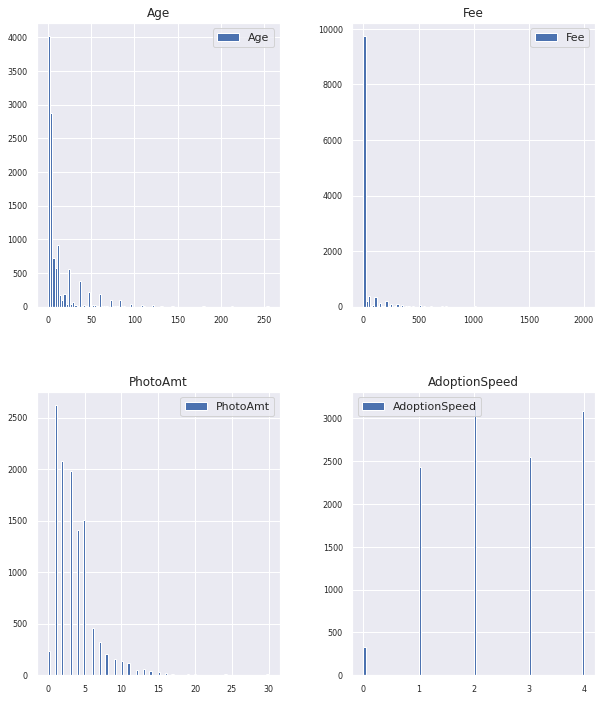

In [13]:
data.hist(figsize=(10, 12), bins=100, xlabelsize=8, ylabelsize=8,legend = True); # ; avoid having the matplotlib verbose informations

### Implementation: Data Exploration
A cursory investigation of the dataset will determine how many individuals fit into either group, and will tell us about the percentage of these individuals making more than \$50,000. In the code cell below, you will need to compute the following:
- The total number of records, `'n_records'`
- The number of individuals making more than \$50,000 annually, `'n_greater_50k'`.
- The number of individuals making at most \$50,000 annually, `'n_at_most_50k'`.
- The percentage of individuals making more than \$50,000 annually, `'greater_percent'`.

** HINT: ** You may need to look at the table above to understand how the `'income'` entries are formatted. 

In [14]:
# TODO: Total number of records
n_records = len(data)

# TODO: Number of records where individual's income is more than $50,000
low = len(data[data['AdoptionSpeed'] == 0])

# TODO: Number of records where individual's income is at most $50,000
medium = len(data[(data['AdoptionSpeed'] == 1) | (data['AdoptionSpeed'] ==2)] )

# TODO: Number of records where individual's income is more than $50,000
high = len(data[data['AdoptionSpeed'] == 3])

# TODO: Number of records where individual's income is at most $50,000
very_high = len(data[data['AdoptionSpeed'] == 4 ])

# TODO: Percentage of individuals whose income is more than $50,000
very_percent = 100*(very_high/n_records)

# Print the results
print("Total number of records             : {}".format(n_records))
print("Individuals very high               : {}".format(very_high))
print("Individuals low                     : {}".format(low))
print("Percentage of very high             : {}%".format(100*very_high/n_records))
print("Percentage of high                  : {}%".format(100*high/n_records))
print("Percentage of medium                : {}%".format(100*medium/n_records))
print("Percentage of low                   : {}%".format(100*low/n_records))

Total number of records             : 11537
Individuals very high               : 3080
Individuals low                     : 329
Percentage of very high             : 26.69671491722285%
Percentage of high                  : 22.042125335875877%
Percentage of medium                : 48.4094651989252%
Percentage of low                   : 2.851694547976077%


** Featureset Exploration **

* **age**: continuous. 
* **workclass**: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked. 
* **education**: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool. 
* **education-num**: continuous. 
* **marital-status**: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse. 
* **occupation**: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces. 
* **relationship**: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried. 
* **race**: Black, White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other. 
* **sex**: Female, Male. 
* **capital-gain**: continuous. 
* **capital-loss**: continuous. 
* **hours-per-week**: continuous. 
* **native-country**: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

----
## Preparing the Data
Before data can be used as input for machine learning algorithms, it often must be cleaned, formatted, and restructured — this is typically known as **preprocessing**. Fortunately, for this dataset, there are no invalid or missing entries we must deal with, however, there are some qualities about certain features that must be adjusted. This preprocessing can help tremendously with the outcome and predictive power of nearly all learning algorithms.

### Transforming Skewed Continuous Features
A dataset may sometimes contain at least one feature whose values tend to lie near a single number, but will also have a non-trivial number of vastly larger or smaller values than that single number.  Algorithms can be sensitive to such distributions of values and can underperform if the range is not properly normalized. With the census dataset two features fit this description: '`capital-gain'` and `'capital-loss'`. 

Run the code cell below to plot a histogram of these two features. Note the range of the values present and how they are distributed.

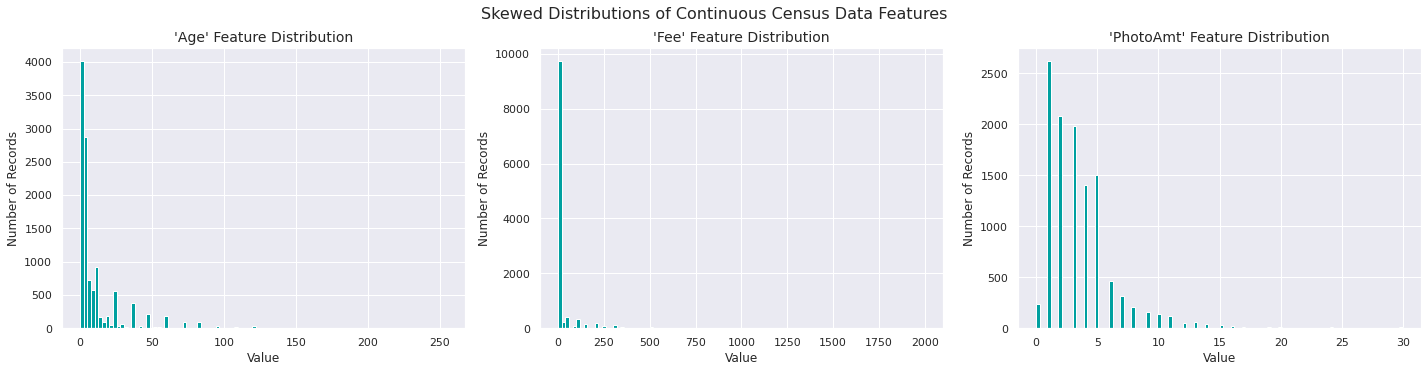

In [15]:
# Split the data into features and target label
income_raw = data['AdoptionSpeed']
features_raw = data.drop('AdoptionSpeed', axis = 1)

# Visualize skewed continuous features of original data
vs.distribution(data)

For highly-skewed feature distributions such as `'capital-gain'` and `'capital-loss'`, it is common practice to apply a <a href="https://en.wikipedia.org/wiki/Data_transformation_(statistics)">logarithmic transformation</a> on the data so that the very large and very small values do not negatively affect the performance of a learning algorithm. Using a logarithmic transformation significantly reduces the range of values caused by outliers. Care must be taken when applying this transformation however: The logarithm of `0` is undefined, so we must translate the values by a small amount above `0` to apply the the logarithm successfully.

Run the code cell below to perform a transformation on the data and visualize the results. Again, note the range of values and how they are distributed. 

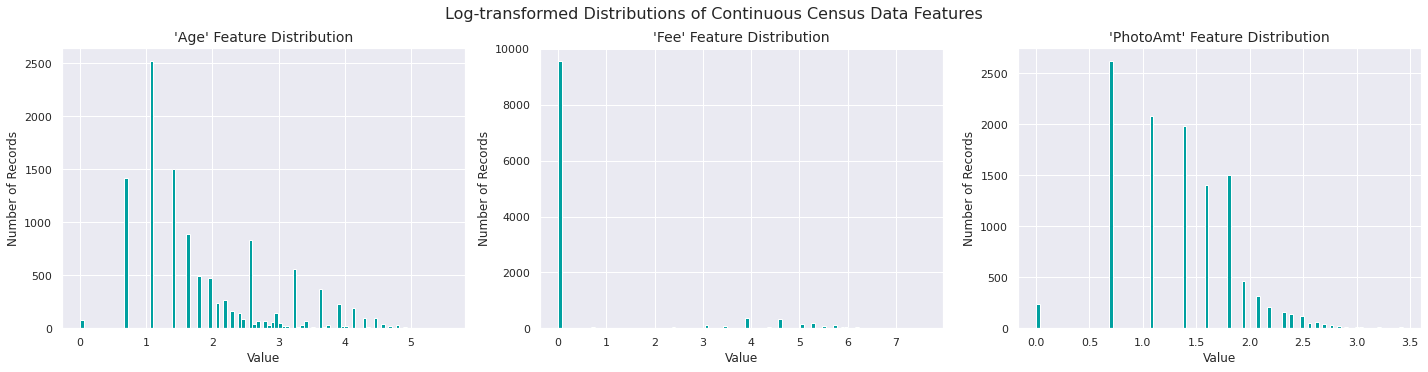

In [16]:
# Log-transform the skewed features
skewed = ['Age', 'Fee', 'PhotoAmt']
features_log_transformed = pd.DataFrame(data = features_raw)
features_log_transformed[skewed] = features_raw[skewed].apply(lambda x: np.log(x + 1))

# Visualize the new log distributions
vs.distribution(features_log_transformed, transformed = True)

### Normalizing Numerical Features
In addition to performing transformations on features that are highly skewed, it is often good practice to perform some type of scaling on numerical features. Applying a scaling to the data does not change the shape of each feature's distribution (such as `'capital-gain'` or `'capital-loss'` above); however, normalization ensures that each feature is treated equally when applying supervised learners. Note that once scaling is applied, observing the data in its raw form will no longer have the same original meaning, as exampled below.

Run the code cell below to normalize each numerical feature. We will use [`sklearn.preprocessing.MinMaxScaler`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) for this.

In [17]:
income_raw.shape

(11537,)

In [18]:
# Import sklearn.preprocessing.StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Initialize a scaler, then apply it to the features
scaler = MinMaxScaler() # default=(0, 1)
numerical = ['Age', 'Fee', 'PhotoAmt']

features_log_minmax_transform = pd.DataFrame(data = features_log_transformed)
features_log_minmax_transform[numerical] = scaler.fit_transform(features_log_transformed[numerical])

# Show an example of a record with scaling applied
display(features_log_minmax_transform.head(n = 1))

,Type,Age,Breed1,Gender,Color1,Color2,MaturitySize,FurLength,Vaccinated,Sterilized,Health,Fee,Description,PhotoAmt
0,Cat,0.25,Tabby,Male,Black,White,Small,Short,No,No,Healthy,0.607141,Nibble is a 3+ month old ball of cuteness. He ...,0.201849


In [19]:
features_log_minmax_transform.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,11537.0,0.342087,0.186682,0.0,0.198120,0.290241,0.462555,1.0
Fee,11537.0,0.099100,0.227990,0.0,0.000000,0.000000,0.000000,1.0
PhotoAmt,11537.0,0.395740,0.164727,0.0,0.319923,0.403698,0.521772,1.0


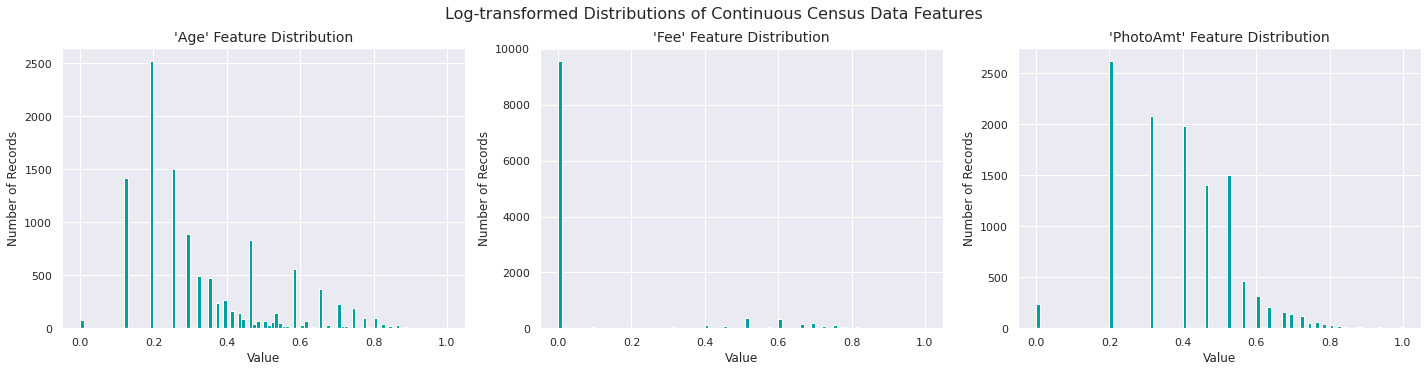

In [20]:
vs.distribution(features_log_minmax_transform, transformed = True)

### Implementation: Data Preprocessing

From the table in **Exploring the Data** above, we can see there are several features for each record that are non-numeric. Typically, learning algorithms expect input to be numeric, which requires that non-numeric features (called *categorical variables*) be converted. One popular way to convert categorical variables is by using the **one-hot encoding** scheme. One-hot encoding creates a _"dummy"_ variable for each possible category of each non-numeric feature. For example, assume `someFeature` has three possible entries: `A`, `B`, or `C`. We then encode this feature into `someFeature_A`, `someFeature_B` and `someFeature_C`.

|   | someFeature |                    | someFeature_A | someFeature_B | someFeature_C |
| :-: | :-: |                            | :-: | :-: | :-: |
| 0 |  B  |  | 0 | 1 | 0 |
| 1 |  C  | ----> one-hot encode ----> | 0 | 0 | 1 |
| 2 |  A  |  | 1 | 0 | 0 |

Additionally, as with the non-numeric features, we need to convert the non-numeric target label, `'income'` to numerical values for the learning algorithm to work. Since there are only two possible categories for this label ("<=50K" and ">50K"), we can avoid using one-hot encoding and simply encode these two categories as `0` and `1`, respectively. In code cell below, you will need to implement the following:
 - Use [`pandas.get_dummies()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html?highlight=get_dummies#pandas.get_dummies) to perform one-hot encoding on the `'features_log_minmax_transform'` data.
 - Convert the target label `'income_raw'` to numerical entries.
   - Set records with "<=50K" to `0` and records with ">50K" to `1`.

In [21]:
# import preprocessing from sklearn
from sklearn import preprocessing


# TODO: One-hot encode the 'features_log_minmax_transform' data using pandas.get_dummies()
features_log_minmax_transform = features_log_minmax_transform.drop('Description', axis = 1)
features_final = pd.get_dummies(data= features_log_minmax_transform)

# TODO: Encode the 'income_raw' data to numerical values
#income = pd.get_dummies(data=)
multi_label = preprocessing.LabelEncoder()
multi_label = multi_label.fit(income_raw)
income = multi_label.transform(income_raw)

# Print the number of features after one-hot encoding
encoded = list(features_final.columns)
print("{} total features after one-hot encoding.".format(len(encoded)))

# Uncomment the following line to see the encoded feature names
#print(encoded)


202 total features after one-hot encoding.


In [22]:
print(encoded)

['Age', 'Fee', 'PhotoAmt', 'Type_Cat', 'Type_Dog', 'Breed1_0', 'Breed1_Abyssinian', 'Breed1_Akita', 'Breed1_American Bulldog', 'Breed1_American Curl', 'Breed1_American Shorthair', 'Breed1_American Staffordshire Terrier', 'Breed1_American Water Spaniel', 'Breed1_American Wirehair', 'Breed1_Applehead Siamese', 'Breed1_Australian Kelpie', 'Breed1_Australian Shepherd', 'Breed1_Australian Terrier', 'Breed1_Balinese', 'Breed1_Basenji', 'Breed1_Basset Hound', 'Breed1_Beagle', 'Breed1_Bedlington Terrier', 'Breed1_Belgian Shepherd Dog Sheepdog', 'Breed1_Belgian Shepherd Laekenois', 'Breed1_Belgian Shepherd Malinois', 'Breed1_Bengal', 'Breed1_Birman', 'Breed1_Black Labrador Retriever', 'Breed1_Black Mouth Cur', 'Breed1_Bobtail', 'Breed1_Bombay', 'Breed1_Border Collie', 'Breed1_Boston Terrier', 'Breed1_Boxer', 'Breed1_British Shorthair', 'Breed1_Bull Terrier', 'Breed1_Bullmastiff', 'Breed1_Burmese', 'Breed1_Burmilla', 'Breed1_Calico', 'Breed1_Cattle Dog', 'Breed1_Cavalier King Charles Spaniel', '

In [23]:
income[:30]

array([2, 0, 3, 2, 2, 2, 1, 1, 4, 1, 1, 2, 2, 4, 3, 4, 2, 2, 4, 1, 2, 1,
       2, 3, 2, 1, 4, 1, 1, 1])

In [24]:
features_final.head(1)

,Age,Fee,PhotoAmt,Type_Cat,Type_Dog,Breed1_0,Breed1_Abyssinian,Breed1_Akita,Breed1_American Bulldog,Breed1_American Curl,Breed1_American Shorthair,Breed1_American Staffordshire Terrier,Breed1_American Water Spaniel,Breed1_American Wirehair,Breed1_Applehead Siamese,Breed1_Australian Kelpie,Breed1_Australian Shepherd,Breed1_Australian Terrier,Breed1_Balinese,Breed1_Basenji,Breed1_Basset Hound,Breed1_Beagle,Breed1_Bedlington Terrier,Breed1_Belgian Shepherd Dog Sheepdog,Breed1_Belgian Shepherd Laekenois,Breed1_Belgian Shepherd Malinois,Breed1_Bengal,Breed1_Birman,Breed1_Black Labrador Retriever,Breed1_Black Mouth Cur,Breed1_Bobtail,Breed1_Bombay,Breed1_Border Collie,Breed1_Boston Terrier,Breed1_Boxer,Breed1_British Shorthair,Breed1_Bull Terrier,Breed1_Bullmastiff,Breed1_Burmese,Breed1_Burmilla,...,Breed1_Weimaraner,Breed1_Welsh Corgi,Breed1_West Highland White Terrier Westie,Breed1_Wheaten Terrier,Breed1_Whippet,Breed1_White German Shepherd,Breed1_Wirehaired Terrier,Breed1_Yellow Labrador Retriever,Breed1_Yorkshire Terrier Yorkie,Gender_Female,Gender_Male,Color1_Black,Color1_Brown,Color1_Cream,Color1_Golden,Color1_Gray,Color1_White,Color1_Yellow,Color2_Brown,Color2_Cream,Color2_Golden,Color2_Gray,Color2_No Color,Color2_White,Color2_Yellow,MaturitySize_Large,MaturitySize_Medium,MaturitySize_Small,FurLength_Long,FurLength_Medium,FurLength_Short,Vaccinated_No,Vaccinated_Not Sure,Vaccinated_Yes,Sterilized_No,Sterilized_Not Sure,Sterilized_Yes,Health_Healthy,Health_Minor Injury,Health_Serious Injury
0,0.25,0.607141,0.201849,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0


### Shuffle and Split Data
Now all _categorical variables_ have been converted into numerical features, and all numerical features have been normalized. As always, we will now split the data (both features and their labels) into training and test sets. 80% of the data will be used for training and 20% for testing.

Run the code cell below to perform this split.

In [25]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_final, 
                                                    income, 
                                                    test_size = 0.2, 
                                                    random_state = 0)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 9229 samples.
Testing set has 2308 samples.


# training data shape :

In [26]:
X_train.shape , y_train.shape

((9229, 202), (9229,))

#test data shape:

In [36]:
X_test.shape , y_test.shape

((2308, 202), (2308,))

In [37]:
labeling = y_train#np.argmax(y_train, axis = 0)

In [38]:
labeling


array([4, 3, 3, ..., 4, 1, 3])

# Average F-Score & Accuracy :

In [39]:

TP = np.sum(income) # Counting the ones as this is the naive case. Note that 'income' is the 'income_raw' data 
#encoded to numerical values done in the data preprocessing step.
FP = len(income) - TP # Specific to the naive case

TN = 0 # No predicted negatives in the naive case
FN = 0 # No predicted negatives in the naive case

# TODO: Calculate accuracy, precision and recall
accuracy = TP + TN / (TP + TN + FP + FN)
recall = TP /(TP + FN)
precision =TP /(TP + FP) 

# TODO: Calculate F-score using the formula above for beta = 0.5 and correct values for precision and recall.
fscore =(1+np.square(0.5)) * precision * recall/((np.square(0.5)*precision)+recall)

# Print the results 
print("Naive Predictor: [Accuracy score: {}, F-score: {}]".format(accuracy, fscore))

Naive Predictor: [Accuracy score: 28687.0, F-score: 1.9166833700808446]


# classifier function :

In [40]:
# TODO: Import two metrics from sklearn - fbeta_score and accuracy_score
from sklearn.metrics import fbeta_score
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA

def train_predict(learner, sample_size, X_train, y_train, X_test, y_test): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
    '''
    
    results = {}
    
    # TODO: Fit the learner to the training data using slicing with 'sample_size' using .fit(training_features[:], training_labels[:])
    start = time() # Get start time
    #pipe = Pipeline([('pca', PCA(n_components=50)),
    #                 ('clf', learner)])

    learner = learner.fit(X_train[:sample_size], y_train[:sample_size])

    end = time() # Get end time
    
    # TODO: Calculate the training time
    results['train_time'] = end - start
        
    # TODO: Get the predictions on the test set(X_test),
    #       then get predictions on the first 300 training samples(X_train) using .predict()
    start = time() # Get start time
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train[:300])
    results['predictions_train'] = predictions_train
    end = time() # Get end time
    
    # TODO: Calculate the total prediction time
    results['pred_time'] = end - start
            
    # TODO: Compute accuracy on the first 300 training samples which is y_train[:300]
    results['acc_train'] = accuracy_score(predictions_train, y_train[:300])
        
    # TODO: Compute accuracy on test set using accuracy_score()
    results['acc_test'] =  accuracy_score(predictions_test, y_test)
    
    # TODO: Compute F-score on the the first 300 training samples using fbeta_score()
    results['f_train'] = fbeta_score(y_train[:300], predictions_train,average='micro',beta=1)
        
    # TODO: Compute F-score on the test set which is y_test
    results['f_test'] = fbeta_score(y_test,predictions_test,average='micro' ,beta=1)
       
    # Success
    print("{} trained on {} samples.".format(learner.__class__.__name__, sample_size))
        
    # Return the results
    return results

## Training Block :

- clf_A = GradientBoostingClassifier(random_state=42 , n_estimators=100 ,max_depth=3 , learning_rate=0.1)
- clf_B = RandomForestClassifier(n_estimators=50 , max_depth=10)
- clf_C = AdaBoostClassifier(n_estimators=50, learning_rate = 1.0)

GradientBoostingClassifier trained on 92 samples.
GradientBoostingClassifier trained on 922 samples.
GradientBoostingClassifier trained on 9229 samples.
RandomForestClassifier trained on 92 samples.
RandomForestClassifier trained on 922 samples.
RandomForestClassifier trained on 9229 samples.
AdaBoostClassifier trained on 92 samples.
AdaBoostClassifier trained on 922 samples.
AdaBoostClassifier trained on 9229 samples.


/content/visuals.py:121: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  pl.tight_layout()


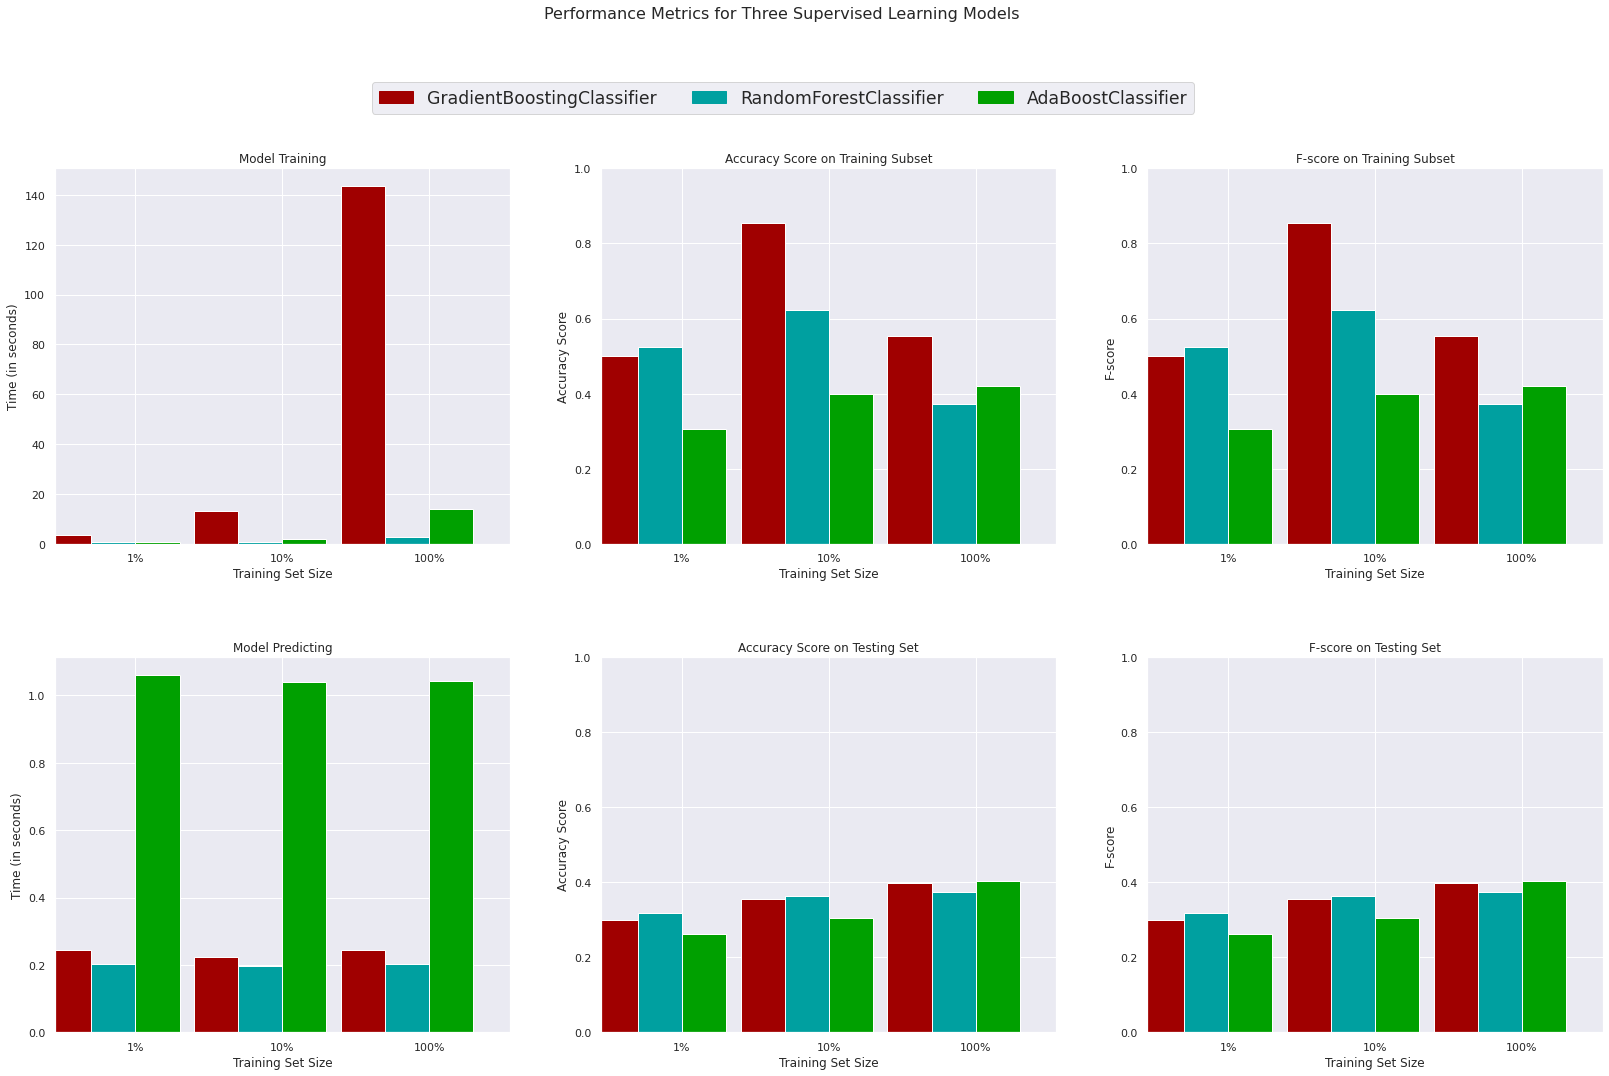

In [41]:
# TODO: Import the three supervised learning models from sklearn

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import fbeta_score
from sklearn.ensemble import GradientBoostingClassifier 
from sklearn.ensemble import AdaBoostClassifier 
from sklearn.ensemble import RandomForestClassifier



# TODO: Initialize the three models
clf_A = GradientBoostingClassifier(random_state=42 , n_estimators=500,max_depth=6 , learning_rate=0.01)
clf_B = RandomForestClassifier(n_estimators=500 , max_depth=6)
clf_C = AdaBoostClassifier(n_estimators=600, learning_rate = 0.9)


# TODO: Calculate the number of samples for 1%, 10%, and 100% of the training data
# HINT: samples_100 is the entire training set i.e. len(y_train)
# HINT: samples_10 is 10% of samples_100 (ensure to set the count of the values to be `int` and not `float`)
# HINT: samples_1 is 1% of samples_100 (ensure to set the count of the values to be `int` and not `float`)
samples_100 = len(y_train)
samples_10 = int(0.1 * samples_100)
samples_1 =  int(0.01 * samples_100)

# Collect results on the learners
results = {}
for clf in [clf_A, clf_B, clf_C]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        results[clf_name][i] = train_predict(clf, samples, X_train, y_train, X_test, y_test)

# Run metrics visualization for the three supervised learning models chosen

vs.evaluate(results, accuracy, fscore)

### Implementation: Model Tuning
Fine tune the chosen model. Use grid search (`GridSearchCV`) with at least one important parameter tuned with at least 3 different values. You will need to use the entire training set for this. In the code cell below, you will need to implement the following:
- Import [`sklearn.grid_search.GridSearchCV`](http://scikit-learn.org/0.17/modules/generated/sklearn.grid_search.GridSearchCV.html) and [`sklearn.metrics.make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html).
- Initialize the classifier you've chosen and store it in `clf`.
 - Set a `random_state` if one is available to the same state you set before.
- Create a dictionary of parameters you wish to tune for the chosen model.
 - Example: `parameters = {'parameter' : [list of values]}`.
 - **Note:** Avoid tuning the `max_features` parameter of your learner if that parameter is available!
- Use `make_scorer` to create an `fbeta_score` scoring object (with $\beta = 0.5$).
- Perform grid search on the classifier `clf` using the `'scorer'`, and store it in `grid_obj`.
- Fit the grid search object to the training data (`X_train`, `y_train`), and store it in `grid_fit`.

**Note:** Depending on the algorithm chosen and the parameter list, the following implementation may take some time to run!

In [ ]:
# TODO: Import 'GridSearchCV', 'make_scorer', and any other necessary libraries
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV

# TODO: Initialize the classifier
clf = clf = GradientBoostingClassifier( random_state=42)

# TODO: Create the parameters list you wish to tune, using a dictionary if needed.
# HINT: parameters = {'n_': [value1, value2], 'parameter_2': [value1, value2]}
parameters = {'n_estimators' :[100,200,300] , 'max_depth':[3,5,7] , 'learning_rate':[0.1, 0.5, 1.0] }

# TODO: Make an fbeta_score scoring object using make_scorer()
scorer = make_scorer(f1_score, average = 'macro')

# TODO: Perform grid search on the classifier using 'scorer' as the scoring method using GridSearchCV()
grid_obj = GridSearchCV(clf, parameters, scorer)

# TODO: Fit the grid search object to the training data and find the optimal parameters using fit()
grid_fit = grid_obj.fit(X_train , y_train)

# Get the estimator
best_clf = grid_fit.best_estimator_

# Make predictions using the unoptimized and model
predictions = (clf.fit(X_train, y_train)).predict(X_test)
best_predictions = best_clf.predict(X_test)



- Calculate the Accuracy_Score test set
- Calculate F1_Score on the test set 

In [ ]:
# Report the before-and-afterscores
print("Unoptimized model\n------")
print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions)))
print("F-score on testing data: {:.4f}".format(f1_score(y_test, predictions,average='macro')))
print("\nOptimized Model\n------")
print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("Final F-score on the testing data: {:.4f}".format(f1_score(y_test, best_predictions,average='macro')))

- Calculate the Accuracy_Score on the training set
- Calculate F1_Score on the training set 

In [ ]:
predictions_train = (clf.fit(X_train, y_train)).predict(X_train)
best_predictions_train = best_clf.predict(X_train)

# Report the before-and-afterscores
print("Unoptimized model\n------")
print("Accuracy score on training data: {:.4f}".format(accuracy_score(y_train, predictions_train)))
print("F-score on training data: {:.4f}".format(f1_score(y_train, predictions_train,average='macro')))
print("\nOptimized Model\n------")
print("Final accuracy score on the training data: {:.4f}".format(accuracy_score(y_train, best_predictions_train)))
print("Final F-score on the training data: {:.4f}".format(f1_score(y_train, best_predictions_train,average='macro')))

# PCA && T-SNE VISUALIZATION :

In [42]:


import pandas as pd
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import seaborn as sns

def tnse_pipeline(X_train , pca_componts =45 , tnse_components= 2 , perplex = 50.0):

      pca = PCA(n_components= 45)#pca_componts)
      components = pca.fit_transform(X_train)

      total_var = pca.explained_variance_ratio_.sum() * 100
      print("total amamout of variation : {}".format(total_var))

      labels = {str(i): f"PC {i+1} ({var:.1f}%)" for i, var in enumerate(pca.explained_variance_ratio_ * 100)}

      # The default of 1,000 iterations gives fine results, but I'm training for longer just 
      # out some marginal improvements. NB: This takes almost an hour!

      tsne = TSNE(random_state=1, n_iter=5000, metric="cosine", n_components= 2 , perplexity= 20.0)
      embs = tsne.fit_transform(components)
      tsne_data = np.vstack((embs.T, labeling)).T
      tsne_df = pd.DataFrame(data=tsne_data, columns=('Dim_1', 'Dim_2', 'label'))
      # Ploting the result of tsne
      sns.FacetGrid(tsne_df, hue='label', height=10).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
      plt.show()

      return pca, tsne_df, components, total_var


total amamout of variation : 98.07255767346169


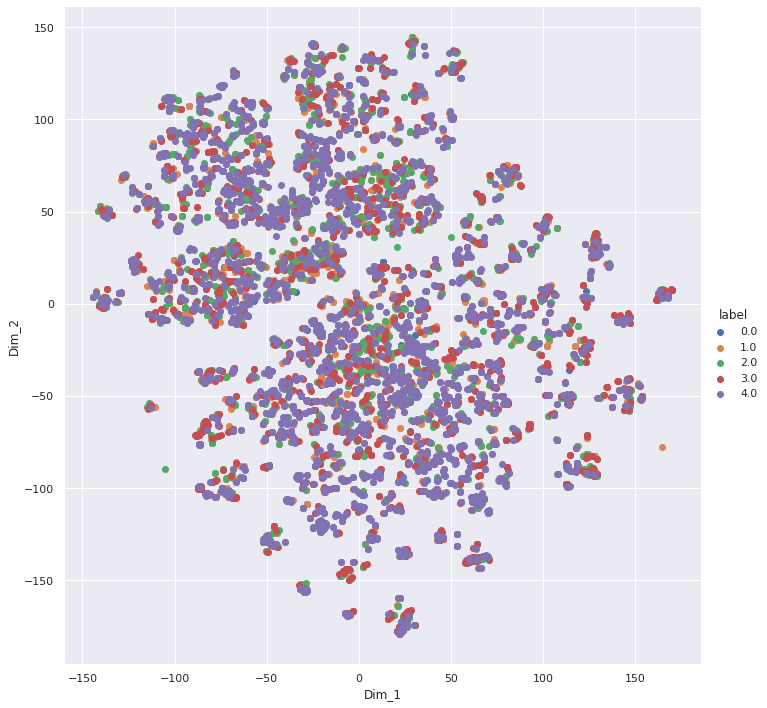

In [43]:

pca , tnse, components, total_var = tnse_pipeline(X_train , pca_componts =45 , tnse_components= 2 , perplex = 50.0)

In [44]:
#print(class_names)
fig = px.scatter_3d(
    components, x=0, y=1, z=2, color=labeling,
    title=f'Total Explained Variance: {total_var:.2f}%',
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'},

    size_max = 15,
    width =  1024,
    height = 1024
    
)
fig.show()

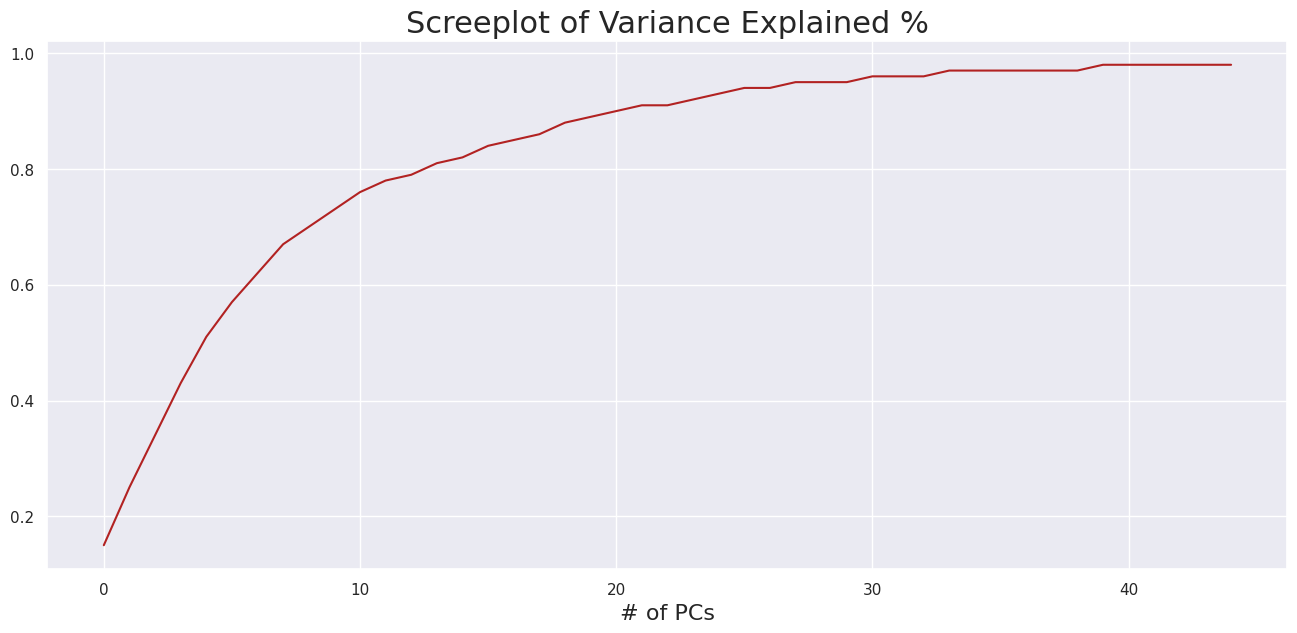

In [45]:
variance_exp_cumsum = pca.explained_variance_ratio_.cumsum().round(2)
fig, axes = plt.subplots(1,1,figsize=(16,7), dpi=100)
plt.plot(variance_exp_cumsum, color='firebrick')
plt.title('Screeplot of Variance Explained %', fontsize=22)
plt.xlabel('# of PCs', fontsize=16)
plt.show()

Text(0, 0.5, 'variance %')

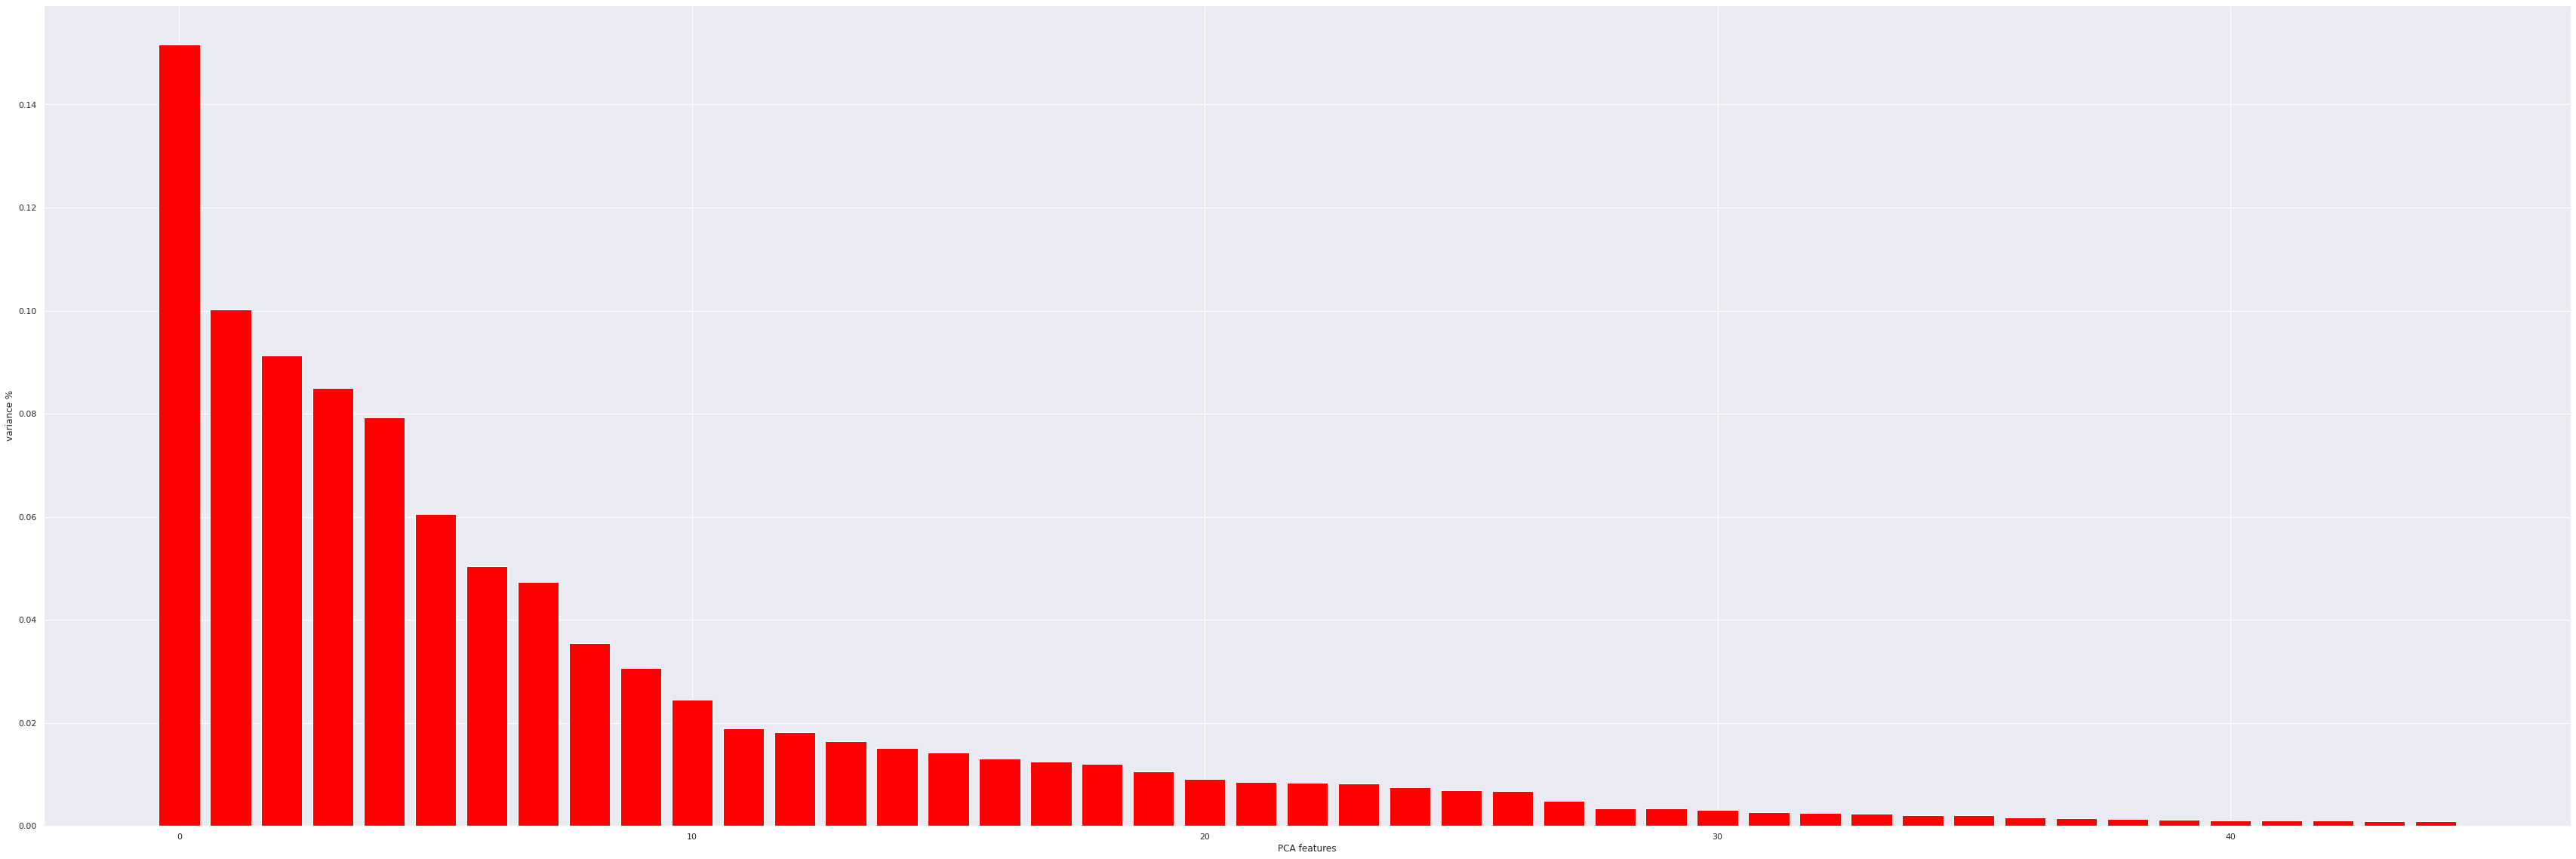

In [46]:
# Plot the explained variances
plt.figure(figsize=(60,20))
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='red')
plt.xlabel('PCA features')
plt.ylabel('variance %')
#plt.xticks(features)

In [47]:
# get basic info
n_components = len(pca.explained_variance_ratio_)
explained_variance = pca.explained_variance_ratio_
cum_explained_variance = np.cumsum(explained_variance)
idx = np.arange(n_components)+1

df_explained_variance = pd.DataFrame([explained_variance, cum_explained_variance], 
                                     index=['explained variance', 'cumulative'], 
                                     columns=idx).T

mean_explained_variance = df_explained_variance.iloc[:37,0].mean() # calculate mean explained variance

# DISPLAY info about PCs
print('PCA Overview')
print('='*40)
print("Total: {} components".format(n_components))
print('-'*40)
print('Mean explained variance:', round(mean_explained_variance,3))
print('-'*40)
print(df_explained_variance.head(45))
print('-'*40)

PCA Overview
Total: 45 components
----------------------------------------
Mean explained variance: 0.026
----------------------------------------
    explained variance  cumulative
1             0.151659    0.151659
2             0.100197    0.251856
3             0.091258    0.343114
4             0.084946    0.428060
5             0.079307    0.507367
6             0.060596    0.567963
7             0.050491    0.618453
8             0.047308    0.665762
9             0.035476    0.701237
10            0.030689    0.731926
11            0.024451    0.756377
12            0.018908    0.775286
13            0.018154    0.793440
14            0.016433    0.809873
15            0.015118    0.824991
16            0.014319    0.839310
17            0.013033    0.852342
18            0.012536    0.864878
19            0.012036    0.876914
20            0.010621    0.887535
21            0.009173    0.896708
22            0.008539    0.905247
23            0.008379    0.913626
24           

In [48]:
# Store as dataframe and print
df_pca = components
df_pca = pd.DataFrame(df_pca)
print(df_pca.shape)  #> (3147, 784)
#df_pca.round(2).head(1)

(9229, 45)


In [49]:
# Principal Components Weights (Eigenvectors)
df_pca_loadings = pd.DataFrame(pca.components_)
print("the pca loading shape: ", df_pca_loadings.shape)
#df_pca_loadings.head()

the pca loading shape:  (45, 202)


In [50]:
############### DEFINE PARAMS
top_k = 3
#select data based on percentile (top_q) or top-k features
top_q = .50
top_pc = 3
###############

# PCA factor loadings
df_c = pd.DataFrame(pca.components_, columns=features_final.columns).T

print("Factor Loadings for the 1. component \n(explains {0:.2f} of the variance)".format(df_explained_variance.iloc[0,0]))
print('='*40,'\n')
print('Top {} highest'.format(top_k))
print('-'*40)
print(df_c.iloc[:,0].sort_values(ascending=False)[:top_k], '\n')

print('Top {} lowest'.format(top_k))
print('-'*40)
print(df_c.iloc[:,0].sort_values()[:top_k])

Factor Loadings for the 1. component 
(explains 0.15 of the variance)

Top 3 highest
----------------------------------------
Type_Cat                      0.490683
Breed1_Domestic Short Hair    0.306878
Vaccinated_No                 0.260606
Name: 0, dtype: float64 

Top 3 lowest
----------------------------------------
Type_Dog             -0.490683
Breed1_Mixed Breed   -0.390487
Vaccinated_Yes       -0.231951
Name: 0, dtype: float64


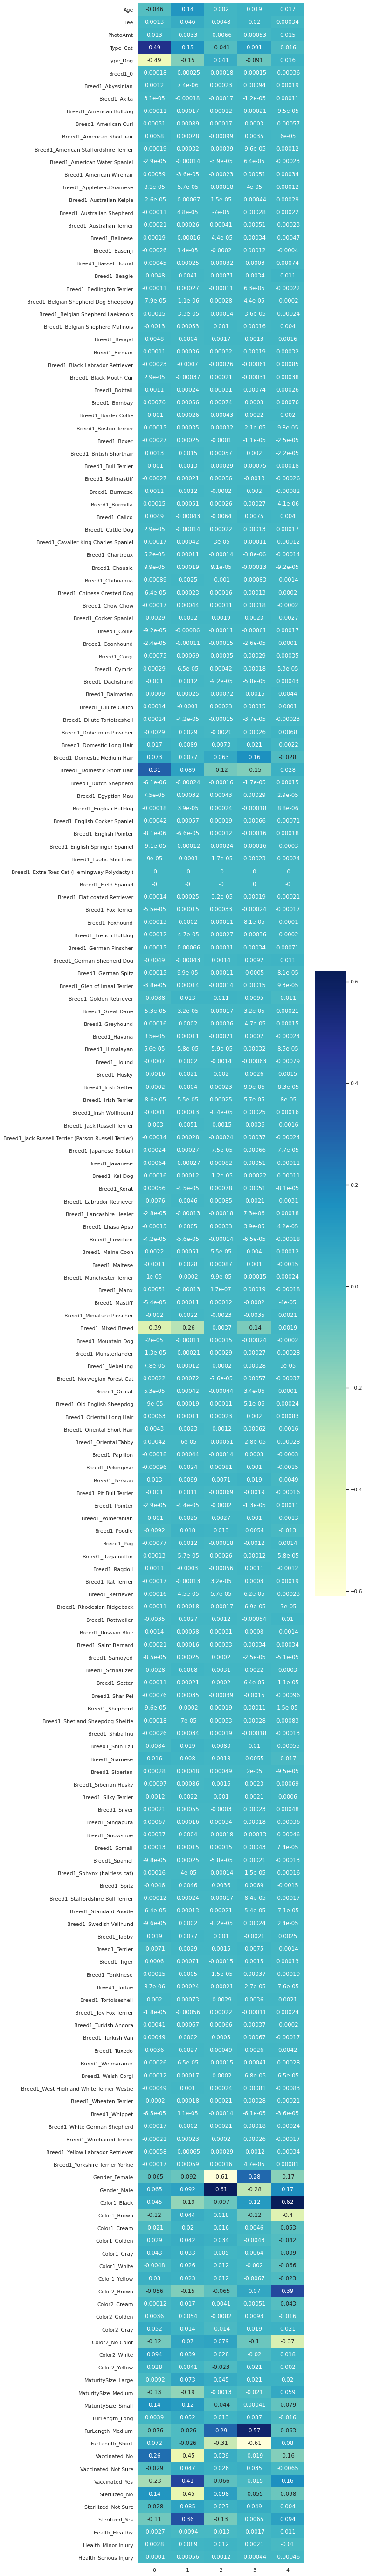

In [51]:
# Plot heatmap
size_yaxis = round(features_final.shape[1]*0.5 )

fig, ax = plt.subplots(figsize=(8,size_yaxis))
sns.heatmap(df_c.iloc[:,:5], annot=True, cmap="YlGnBu", ax=ax)
plt.show()

In [54]:
def pca_results(df, pca, component_no, features_no, show_plot=True):
    
    # Build a dataframe with features_no features capturing most variability
    # for a given component number (component_no)
    pca_comp = pd.DataFrame(np.round(pca.components_, 4), columns=df.keys()).iloc[component_no - 1]
    pca_comp.sort_values(ascending=False, inplace=True)
    pca_comp = pd.concat([pca_comp.head(features_no), pca_comp.tail(features_no)])
    
    if show_plot:
        # Plot the result
        pca_comp.plot(kind='bar', 
                  title='Most {} weighted features for PCA component {}'.format(features_no*2, component_no),
                  figsize=(12, 6))
        plt.show()
    
    return pca_comp

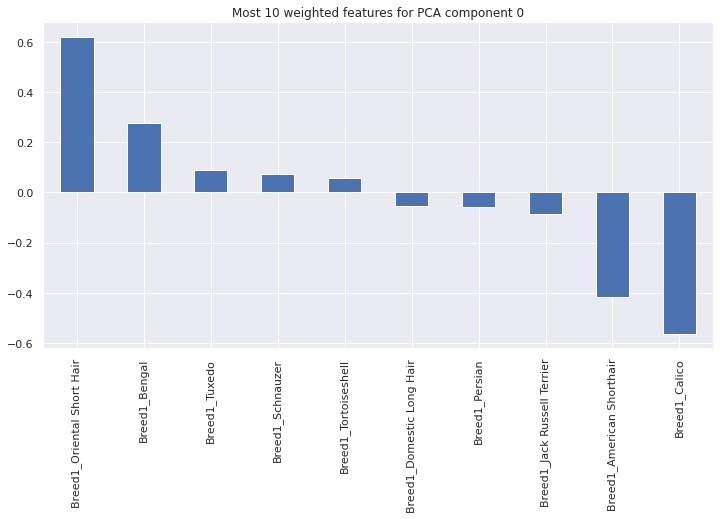

Breed1_Oriental Short Hair     0.6204
Breed1_Bengal                  0.2767
Breed1_Tuxedo                  0.0899
Breed1_Schnauzer               0.0755
Breed1_Tortoiseshell           0.0574
Breed1_Domestic Long Hair     -0.0559
Breed1_Persian                -0.0579
Breed1_Jack Russell Terrier   -0.0842
Breed1_American Shorthair     -0.4179
Breed1_Calico                 -0.5637
Name: 44, dtype: float64


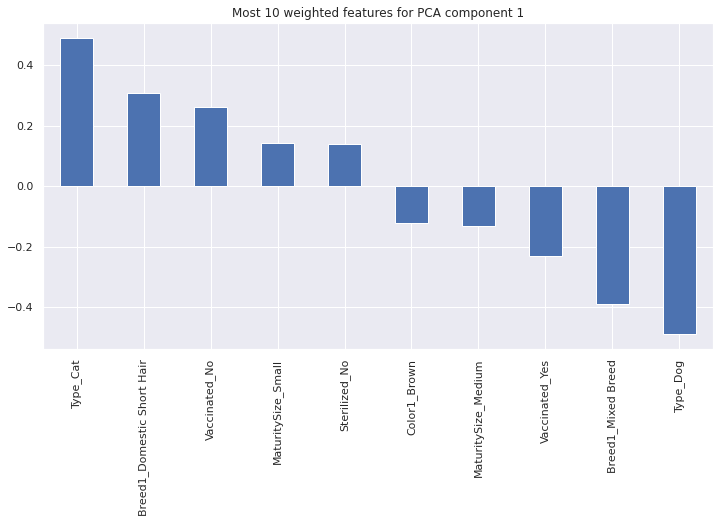

Type_Cat                      0.4907
Breed1_Domestic Short Hair    0.3069
Vaccinated_No                 0.2606
MaturitySize_Small            0.1417
Sterilized_No                 0.1386
Color1_Brown                 -0.1210
MaturitySize_Medium          -0.1325
Vaccinated_Yes               -0.2320
Breed1_Mixed Breed           -0.3905
Type_Dog                     -0.4907
Name: 0, dtype: float64


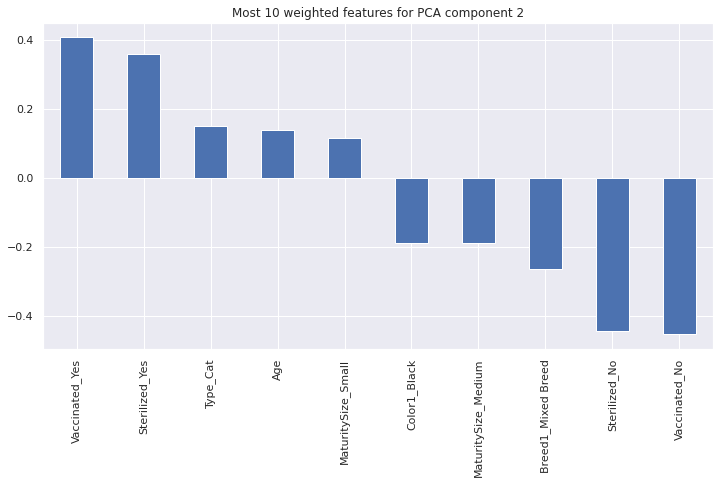

Vaccinated_Yes         0.4065
Sterilized_Yes         0.3600
Type_Cat               0.1490
Age                    0.1395
MaturitySize_Small     0.1158
Color1_Black          -0.1881
MaturitySize_Medium   -0.1888
Breed1_Mixed Breed    -0.2645
Sterilized_No         -0.4454
Vaccinated_No         -0.4531
Name: 1, dtype: float64


In [55]:
for i in np.arange(0, 3, 1):
    res = pca_results(features_final, pca, i, 5)
    print(res)